### Exercício 2

Escolha um conjunto de dados pequeno ou médio (de 100 a 500 linhas) de sua preferência. 
Sugestões:
- Dados esportivos (resultados de jogos, medalhas, rankings)
- Dados ambientais (chuvas, temperaturas, qualidade do ar)
- Dados de séries ou músicas (Spotify, IMDb, etc.)

Carregue o conjunto de dados em Python usando pandas ou outra forma que considerar ideal.
Produza ao menos 4 tipos diferentes de visualizações, com foco em:
- Gráfico de barras
- Gráfico de dispersão (scatter plot)
- Histograma
- Gráfico de linha
- (Extra: mapa, boxplot, heatmap, gráfico de pizza, violin plot, etc.)

Para cada gráfico:
- Personalize os eixos, títulos e cores
- Destaque algum insight ou observação relevante
- Escreva ao menos 2 parágrafo explicando o que a visualização mostra e por que ela é adequada (ou não) para aquele dado

ETAPA 1: VISÃO GERAL DO DATASET
Dimensões do DataFrame: (250, 10)
Colunas presentes: ['Unnamed: 0', 'Title', 'Year', 'Genre', 'Duration', 'Origin', 'Director', 'IMDB rating', 'Rating count', 'IMDB link']

--- 5 Primeiras Linhas do Dataset ---
   Unnamed: 0                     Title  Year  \
0           1  The Shawshank Redemption  1994   
1           2             The Godfather  1972   
2           3    The Godfather: Part II  1974   
3           4           The Dark Knight  2008   
4           5              12 Angry Men  1957   

                               Genre  Duration    Origin  \
0                              Drama  2h 22min       USA   
1                      Drama | Crime  2h 55min       USA   
2                      Drama | Crime  3h 22min       USA   
3  Drama | Action | Thriller | Crime  2h 32min  USA | UK   
4                              Drama  1h 36min       USA   

               Director  IMDB rating  Rating count  \
0        Frank Darabont          9.3       2030

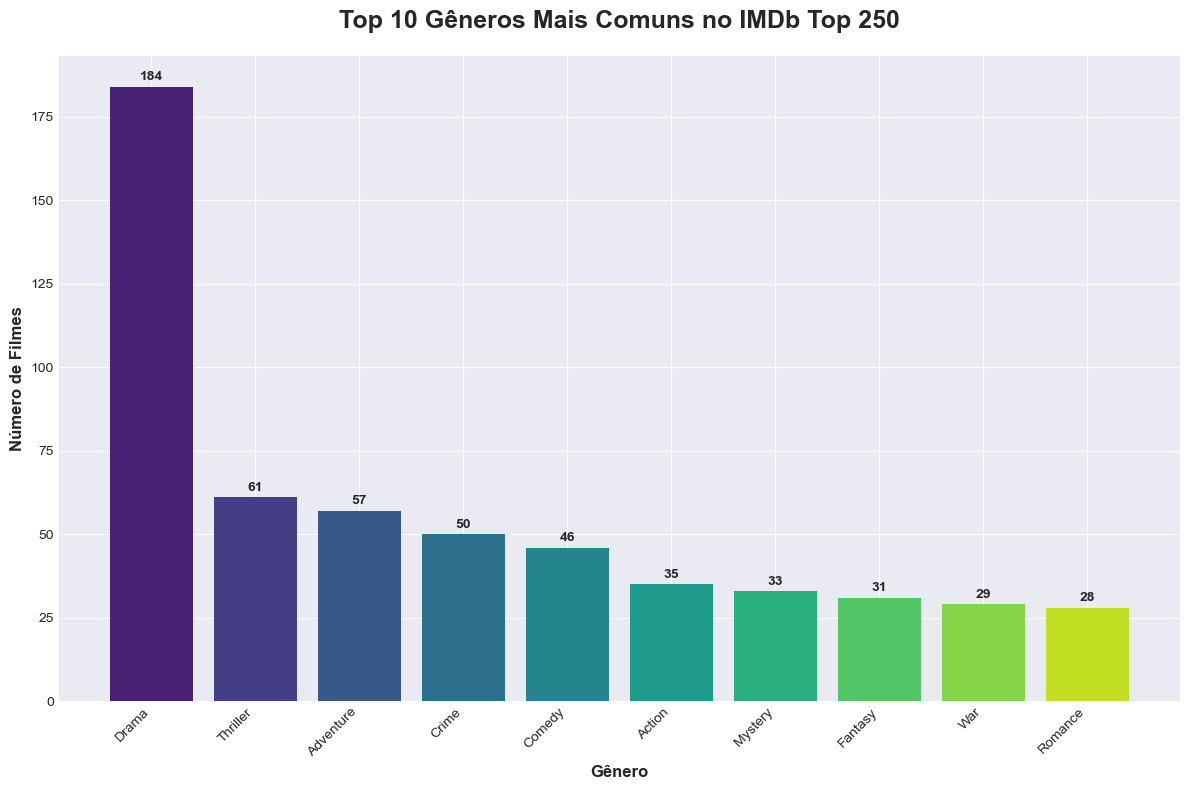


--- Insights do Gráfico de Gêneros ---
O gênero 'Drama' é o mais presente, aparecendo em 184 filmes da lista.
O segundo gênero mais comum é 'Thriller' com 61 aparições.
-----------------------------------



--- Insights do Gráfico Interativo de Dispersão ---
Filme com maior nota: The Shawshank Redemption (Nota 9.3)
Filme com mais votos: The Shawshank Redemption (2,030,817 votos)
Período analisado: de 1921 a 2018
Variação das notas: de 8.0 a 9.3

Dicas de Interação:
• Passe o mouse sobre os pontos para ver detalhes do filme.
• Use a roda do mouse para dar zoom.
• Clique e arraste para mover o gráfico.
-----------------------------------


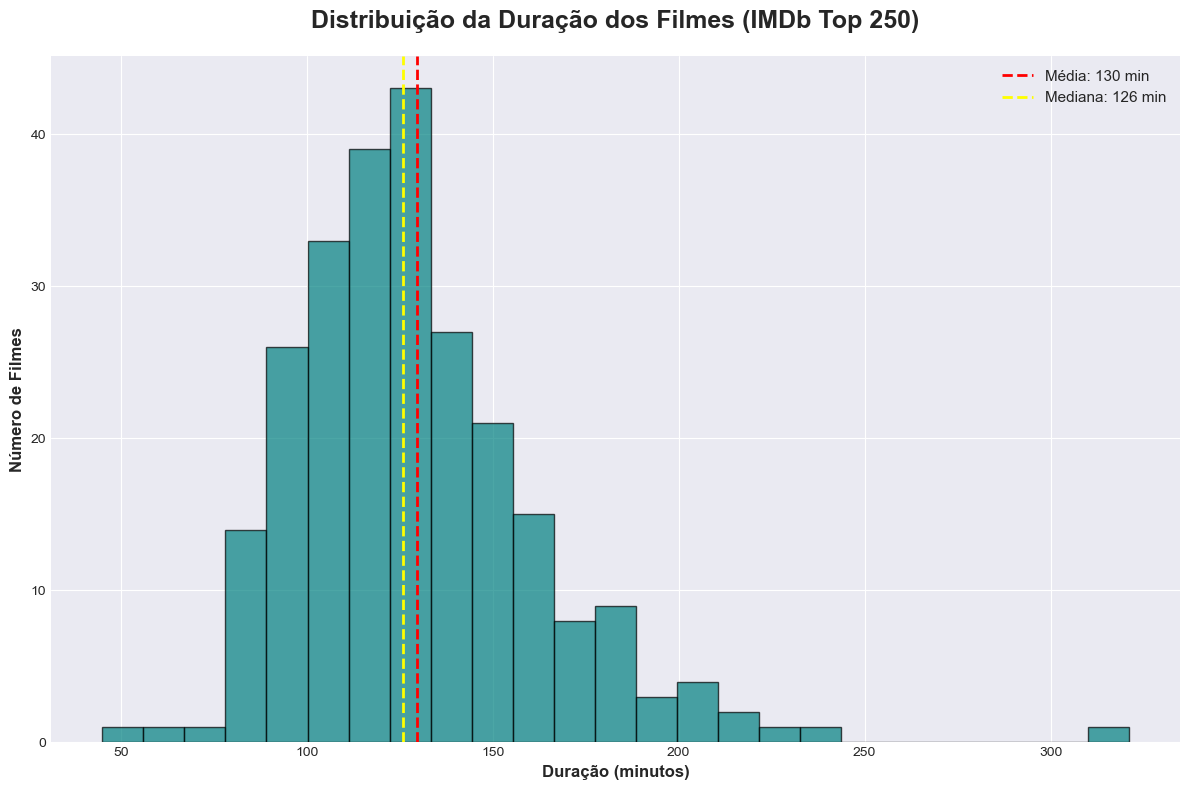


--- Insights do Histograma de Duração ---
A duração média dos filmes é de 129.7 minutos (aproximadamente 2.2 horas).
A maioria dos filmes se concentra na faixa de 100 a 150 minutos.
Filme mais curto: 45 min, Filme mais longo: 321 min.
-----------------------------------


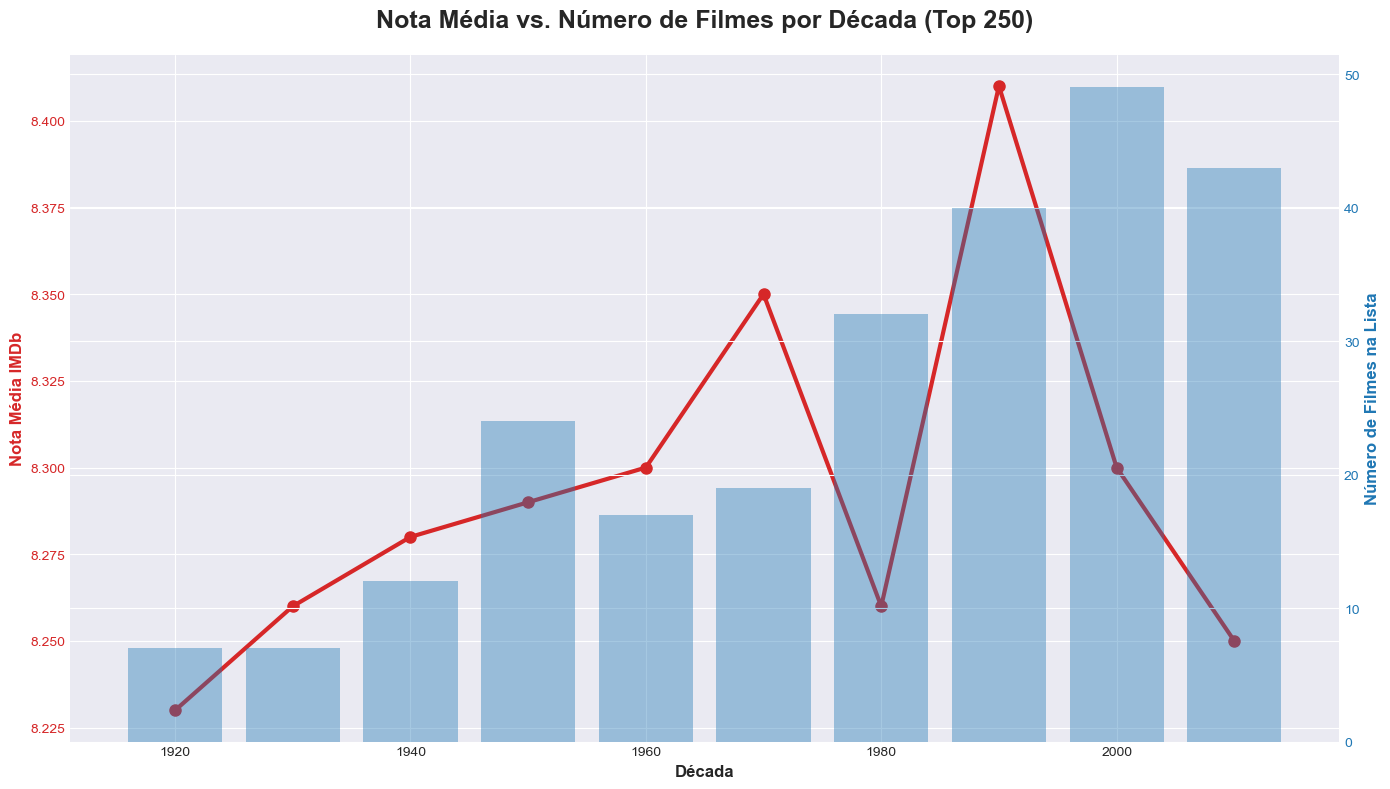


--- Insights do Gráfico de Décadas ---
A década com a maior nota média na lista é a de 1990.
A década mais produtiva (com mais filmes na lista) é a de 2000.
-----------------------------------



--- Insights do Gráfico Sunburst ---

Combinações Gênero-Década mais populares:
   • Drama nos anos 2000s: 37 filmes
   • Drama nos anos 2010s: 33 filmes
   • Drama nos anos 1990s: 31 filmes
   • Drama nos anos 1980s: 19 filmes
   • Drama nos anos 1950s: 18 filmes


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# --- 1. Carregamento e Exploração Inicial dos Dados ---

# URL do conjunto de dados bruto no GitHub
url = "https://raw.githubusercontent.com/itiievskyi/IMDB-Top-250/master/imdb_top_250.csv"
# Carregando os dados para um DataFrame do pandas
df = pd.read_csv(url)

print("ETAPA 1: VISÃO GERAL DO DATASET")
print("="*35)
print(f"Dimensões do DataFrame: {df.shape}")
print(f"Colunas presentes: {list(df.columns)}")
print("\n--- 5 Primeiras Linhas do Dataset ---")
print(df.head())
print("\n--- Tipos de Dados e Valores Ausentes ---")
df.info()
print("\n--- Estatísticas Descritivas das Colunas Numéricas ---")
print(df.describe())
print("="*35)
print("\n")

# --- 2. Limpeza e Pré-processamento dos Dados ---

print("ETAPA 2: LIMPEZA E PRÉ-PROCESSAMENTO")
print("="*35)

# Convertendo a coluna 'Year' para numérica e tratando possíveis erros
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Criando uma coluna 'Decada' para agrupar os filmes
df['Decada'] = (df['Year'] // 10) * 10

# A coluna 'Duration' está como texto (ex: '2h 22min'). Conversão para minutos.
horas_em_minutos = df['Duration'].str.extract(r'(\d+)h').fillna(0).astype(int) * 60
minutos = df['Duration'].str.extract(r'(\d+)min').fillna(0).astype(int)
df['Duration_minutes'] = horas_em_minutos + minutos

print("Valores únicos suspeitos na coluna Genre:")
unique_genres = df['Genre'].str.split(' | ').explode().unique()
suspicious = [g for g in unique_genres if g and ('\\' in str(g) or '/' in str(g) or len(str(g)) < 3)]
print(suspicious[:10])

# Limpeza da coluna 'Genre'
df['Genre'] = df['Genre'].str.replace(r'[\\\/]', '', regex=True)  # Remove qualquer barra

# Criando lista de gêneros para análise
genres_list = df['Genre'].str.split(' | ').explode()
genres_list = genres_list[genres_list.str.strip() != '']
genres_list = genres_list.str.strip()
# Filtrar gêneros muito curtos ou suspeitos
genres_list = genres_list[genres_list.str.len() > 1]

print("Colunas 'Decada' e 'Duration_minutes' criadas com sucesso.")
print(f"Total de gêneros únicos identificados: {genres_list.nunique()}")
print("="*35)
print("\n")

# --- 3. Visualização de Dados ---

print("ETAPA 3: VISUALIZAÇÃO DE DADOS E INSIGHTS")
print("="*40)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

# -- GRÁFICO 1: Distribuição dos Principais Gêneros --

# Conta a frequência de cada gênero e pega os 10 mais comuns
genre_counts = genres_list.value_counts().head(10)

plt.figure(figsize=(12, 8))
bars = plt.bar(genre_counts.index, genre_counts.values,
               color=sns.color_palette("viridis", n_colors=10))

plt.title('Top 10 Gêneros Mais Comuns no IMDb Top 250', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Gênero', fontsize=12, fontweight='bold')
plt.ylabel('Número de Filmes', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n--- Insights do Gráfico de Gêneros ---")
print(f"O gênero 'Drama' é o mais presente, aparecendo em {genre_counts['Drama']} filmes da lista.")
print(f"O segundo gênero mais comum é '{genre_counts.index[1]}' com {genre_counts.iloc[1]} aparições.")
print("-" * 35)


# -- GRÁFICO 2: Relação Interativa entre Nota IMDb, Ano e Duração --

# Utilizando Plotly para um gráfico interativo
fig_scatter = px.scatter(
    df, x='Year', y='IMDB rating',
    size='Rating count',
    color='Duration_minutes',
    hover_name='Title',
    hover_data={
        'Director': True,
        'Genre': True,
        'Year': True,
        'IMDB rating': ':.1f',
        'Duration_minutes': True,
        'Rating count': ':,d'
    },
    title='Nota IMDb vs. Ano de Lançamento (Top 250 Filmes)',
    labels={
        'IMDB rating': 'Nota IMDb',
        'Year': 'Ano de Lançamento',
        'Duration_minutes': 'Duração (minutos)',
        'Rating count': 'Quantidade de Votos'
    },
    color_continuous_scale='viridis',
    size_max=20)

fig_scatter.update_layout(
    height=700,
    width=1000,
    title_font_size=20,
    title_x=0.5,
    xaxis=dict(title_font_size=14),
    yaxis=dict(title_font_size=14, range=[7.9, 9.4]),
    plot_bgcolor='white'
)

# Anotações para destacar filmes importantes
highest_rated = df.loc[df['IMDB rating'].idxmax()]
most_voted = df.loc[df['Rating count'].idxmax()]

fig_scatter.add_annotation(
    x=highest_rated['Year'], y=highest_rated['IMDB rating'],
    text=f"Maior Nota:<br>{highest_rated['Title']}<br>({highest_rated['IMDB rating']})",
    showarrow=True, arrowhead=2, arrowcolor="red", ax=50, ay=-50,
    bgcolor="yellow", bordercolor="red", borderwidth=2
)

fig_scatter.add_annotation(
    x=most_voted['Year'], y=most_voted['IMDB rating'],
    text=f"Mais Votado:<br>{most_voted['Title']}<br>({most_voted['Rating count']:,} votos)",
    showarrow=True, arrowhead=2, arrowcolor="blue", ax=-80, ay=30,
    bgcolor="lightblue", bordercolor="blue", borderwidth=2
)

fig_scatter.show()

print("\n--- Insights do Gráfico Interativo de Dispersão ---")
print(f"Filme com maior nota: {highest_rated['Title']} (Nota {highest_rated['IMDB rating']})")
print(f"Filme com mais votos: {most_voted['Title']} ({most_voted['Rating count']:,} votos)")
print(f"Período analisado: de {df['Year'].min():.0f} a {df['Year'].max():.0f}")
print(f"Variação das notas: de {df['IMDB rating'].min()} a {df['IMDB rating'].max()}")
print("\nDicas de Interação:")
print("• Passe o mouse sobre os pontos para ver detalhes do filme.")
print("• Use a roda do mouse para dar zoom.")
print("• Clique e arraste para mover o gráfico.")
print("-" * 35)


# -- GRÁFICO 3: Histograma da Duração dos Filmes --

plt.figure(figsize=(12, 8))
plt.hist(df['Duration_minutes'], bins=25, color='teal', alpha=0.7, edgecolor='black')

plt.title('Distribuição da Duração dos Filmes (IMDb Top 250)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Duração (minutos)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Filmes', fontsize=12, fontweight='bold')

# Linhas de média e mediana para referência
mean_duration = df['Duration_minutes'].mean()
median_duration = df['Duration_minutes'].median()

plt.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_duration:.0f} min')
plt.axvline(median_duration, color='yellow', linestyle='--', linewidth=2, label=f'Mediana: {median_duration:.0f} min')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("\n--- Insights do Histograma de Duração ---")
print(f"A duração média dos filmes é de {mean_duration:.1f} minutos (aproximadamente {mean_duration/60:.1f} horas).")
print(f"A maioria dos filmes se concentra na faixa de 100 a 150 minutos.")
print(f"Filme mais curto: {df['Duration_minutes'].min()} min, Filme mais longo: {df['Duration_minutes'].max()} min.")
print("-" * 35)


# -- GRÁFICO 4: Tendência de Notas e Contagem de Filmes por Década --

# Agrupando os dados por década
decade_stats = df.groupby('Decada').agg(
    Avg_Rating=('IMDB rating', 'mean'),
    Movie_Count=('Title', 'count')
).round(2).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:red'
ax1.set_xlabel('Década', fontsize=12, fontweight='bold')
ax1.set_ylabel('Nota Média IMDb', color=color, fontsize=12, fontweight='bold')
ax1.plot(decade_stats['Decada'], decade_stats['Avg_Rating'], color=color, marker='o', linewidth=3, markersize=8, label='Nota Média')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Número de Filmes na Lista', color=color, fontsize=12, fontweight='bold')
ax2.bar(decade_stats['Decada'], decade_stats['Movie_Count'], alpha=0.4, color=color, width=8, label='Nº de Filmes')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Nota Média vs. Número de Filmes por Década (Top 250)', fontsize=18, fontweight='bold', pad=20)
fig.tight_layout()
plt.show()

print("\n--- Insights do Gráfico de Décadas ---")
print(f"A década com a maior nota média na lista é a de {decade_stats.loc[decade_stats['Avg_Rating'].idxmax(), 'Decada']:.0f}.")
print(f"A década mais produtiva (com mais filmes na lista) é a de {decade_stats.loc[decade_stats['Movie_Count'].idxmax(), 'Decada']:.0f}.")
print("-" * 35)


# -- GRÁFICO 5: Análise Hierárquica de Gêneros por Década (Sunburst) --

# Preparando os dados para o gráfico Sunburst
sunburst_data = []
for index, row in df.iterrows():
    genres = [g.strip() for g in str(row['Genre']).split(' | ') if g.strip() and g.strip() != '\\']
    for genre in genres:
        sunburst_data.append({
            'Decada': f"{int(row['Decada'])}s",
            'Genero': genre,
            'Titulo': row['Title'],
            'Nota': row['IMDB rating']
        })
sunburst_df = pd.DataFrame(sunburst_data)

# Criando o gráfico
fig_sunburst = px.sunburst(
    sunburst_df,
    path=['Decada', 'Genero'],
    values=None, # O tamanho é proporcional à contagem de itens
    color='Nota',
    color_continuous_scale='RdYlBu_r', # Paleta de cores
    color_continuous_midpoint=np.average(sunburst_df['Nota']), # Ponto médio da cor é a nota média
    title='Distribuição de Gêneros por Década (Gráfico Sunburst Interativo)',
    hover_name='Genero',
    hover_data={'Nota': ':.2f'}
)

# Customizando o layout e as informações do hover
fig_sunburst.update_layout(height=800, width=800, title_x=0.5)
fig_sunburst.update_traces(
    hovertemplate='<b>%{label}</b><br>Contagem: %{value}<br>Percentual do Pai: %{percentParent}<extra></extra>',
    maxdepth=2
)

fig_sunburst.show()

print("\n--- Insights do Gráfico Sunburst ---")
decade_genre_summary = sunburst_df.groupby(['Decada', 'Genero']).size().reset_index(name='Count')
top_combinations = decade_genre_summary.nlargest(5, 'Count')

print("\nCombinações Gênero-Década mais populares:")
for _, row in top_combinations.iterrows():
    print(f"   • {row['Genero']} nos anos {row['Decada']}: {row['Count']} filmes")